In [1]:
import matplotlib.pyplot as plt
from numpy import arange, linspace, pi, cos, sin, sqrt, linspace, array, transpose
import ipywidgets as widgets
from IPython.display import display
from multiprocessing.pool import ThreadPool
from time import process_time
%matplotlib widget

Text(value='Press Button for Operation', disabled=True)

Output()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
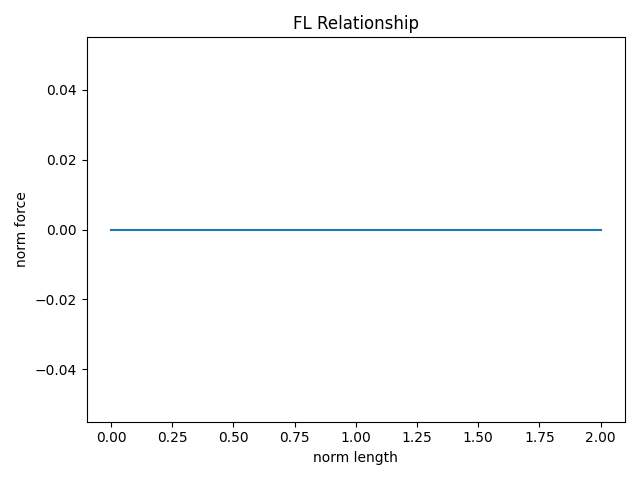

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
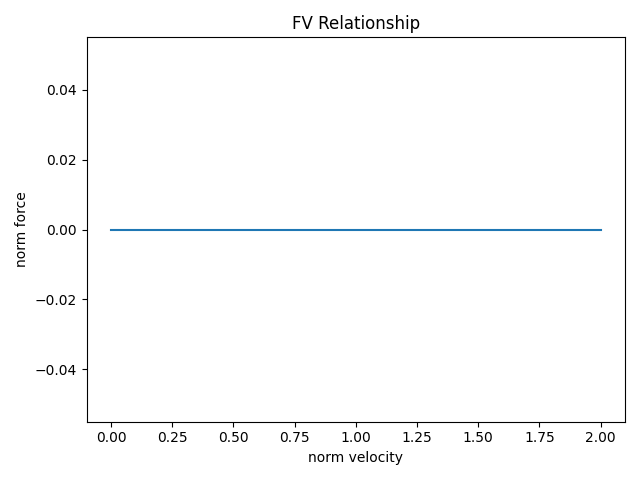

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
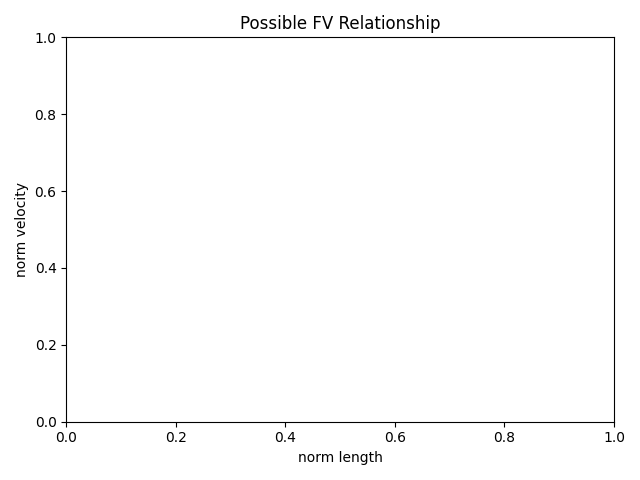

In [3]:
c = 2.5
vmax = 3
lop = 1

def velocity(lop):
    fl_relationship_result = fl_relationship(lop)
    result = [[], []]
    result[0] = [((vmax-v)/(vmax + 2.5*v)) for v in linspace(-1, 0.5, 100)]
    result[1] = [(1.3 - 0.3*((vmax - c*vmax)/(1 + c**2*v))) for v in linspace(-1, 0.5, 100)]
    
    result_3d = []
    for l in linspace(0.5*lop, 1.5*lop, 100):
        temp = []
        for v in linspace(-2, 2, 400):
            if v <= 0:
                temp += [(vmax+v)/(vmax - 2.5*v)]
            else:
                temp += [1.3 - 0.1*((vmax - v)/(1 + c**2*v))]
        result_3d += [temp]
    return result, result_3d

def fl_relationship(lop):
    return [(1 - ((x - lop)/0.5*lop)**2) for x in linspace(0.5*lop, 1.5*lop, 100)]
                                  
########################  Operation
opening_text = widgets.Text(value='Press Button for Operation',
                       disabled=True)
button_relationship = widgets.Button(description='Relationship')
def on_button_relationsip(change):
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    async_result_0 = pool.apply_async(fl_relationship, (lop,))
    fl_relationship_result = async_result_0.get()
    async_result_1 = pool.apply_async(velocity, (lop,))
    fv_relationship_result, fv_relationship_result_2d = async_result_1.get()
    fv_relationship_result = fv_relationship_result_2d[0]
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(linspace(0.5*lop, 1.5*lop, len(fl_relationship_result)), fl_relationship_result)
        fig_0_ax.set_xlim([0.5*lop-1, 1.5*lop+1])
        fig_0_ax.set_ylim([min(fl_relationship_result), max(fl_relationship_result)])
    with out_1:
        plot_1.set_data(linspace(-1, 0.5, len(fv_relationship_result)), fv_relationship_result)
        fig_1_ax.set_xlim([-1, 0.5])
        fig_1_ax.set_ylim([min(fv_relationship_result), max(fv_relationship_result)])
    with out_2:
        plt.imshow(transpose(fv_relationship_result_2d), interpolation='none', extent=[0.5*lop, 1.5*lop, -1, 0.5])
        plt.colorbar()
        plt.tight_layout()
button_relationship.on_click(on_button_relationsip)
                                  
######################## Widget Outputs
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=1, ncols=1)
    fig_0_ax.set(xlabel="norm length", ylabel="norm force", title="FL Relationship")
    plot_0, = fig_0_ax.plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_1 = widgets.Output()
with out_1:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=1, ncols=1)
    fig_1_ax.set(xlabel="norm velocity", ylabel="norm force", title="FV Relationship")
    plot_1, = fig_1_ax.plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_2 = widgets.Output()
with out_2:
    try:
        plt.close(fig_2)
    except:
        pass
    fig_2, fig_2_ax = plt.subplots(nrows=1, ncols=1)
    fig_2_ax.set(xlabel="norm length", ylabel="norm velocity", title="Possible FV Relationship")
    plt.tight_layout()

horizontal_box_0 = widgets.HBox([out_0, out_1])
display(opening_text, button_relationship, horizontal_box_0, out_2)
                                  